In [65]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D

# 适应度函数计算
# f(x,y) = sin(sqrt(x^2 + y^2)) / sqrt(x^2 + y^2) +
# e^((cos(2πx) + cos(2πy))/2) -
# 2.71289
def fun(x, y):
    part1 = np.sin(sqrt(x ** 2 + y ** 2)) / sqrt(x ** 2 + y ** 2)
    part2_1 = (np.cos(2 * math.pi * x) + np.cos(2 * math.pi * y)) / 2
    part2 = np.exp(part2_1)
    part3 = -2.71289
    res = part1 + part2 + part3
    return res

if __name__ == '__main__':
    ## 参数初始化
    # 速度更新参数
    c1 = 1.49445
    c2 = 1.49445

    # 进化次数
    maxgen = 300
    # 种群规模
    sizepop = 20
    # 个体和速度的最大最小值
    popmax = 2
    popmin = -2
    Vmax = 0.5
    Vmin = -0.5
    c1 = 2
    c2 = 2

    # 适应度
    fitness = []
    pops = []
    Vs = []
    gbest = np.zeros((sizepop, 2))

    ## 随机产生初始粒子和速度
    for i in range(sizepop):
        # 初始种群，位置和速度
        currentPop = np.random.uniform(-2, 2, (1, 2))
        pops.append(currentPop)

        currentV = np.random.uniform(-0.5, 0.5, (1, 2))
        Vs.append(currentV)
        #print('Vs:%s' %(Vs))
        # 粒子适应度计算
        res = fun(currentPop[0][0], currentPop[0][1])
        fitness.append(res)
    fitness = np.array(fitness)
    bestfitness, bestindex = np.max(fitness), np.argmax(fitness)
    # 最优值对应个体(x,y)
    zbest = pops[bestindex]
    gbest = pops
    # 最优值f(x,y)
    fitnesszbest = bestfitness
    fitnessbest = fitness

the zbest : [[ 0.15594122 -1.06281029]]


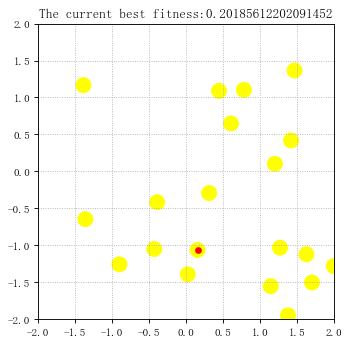

In [66]:
# 初始结果显示
# 设置图像大小、格式
fig1 = plt.figure(dpi=80)
plt.grid(linestyle="dotted")
axes = plt.gca()
axes.set_aspect(1)
# 设置坐标范围
plt.xlim(-2, 2)
plt.ylim(-2, 2)
for i in range(sizepop):
    # print("gbest[i] %s" %(gbest[i]))
    # x
    x = gbest[i][0][0]
    # y
    y = gbest[i][0][1]
    # 显示每个种群个体
    draw_circle = plt.Circle((x,y), 0.1, fill=True, color="yellow")
    plt.gcf().gca().add_artist(draw_circle)
# 标题，中文有乱码需要设置字体
plt.title('The current best fitness:%s' %(fitnesszbest))
# 显示极值点，标记为红色: c = color, zorder = 图像显示优先级
print('the zbest : %s' %(zbest))
plt.scatter(zbest[0][0], zbest[0][1], c='r', linewidths=0.1, zorder=2)



In [67]:
popMax = 2
popMin = -2
Vmax = 0.5
Vmin = -0.5
result = np.zeros(maxgen)
for i in range(maxgen):
    # 相当于对于maxgen的每个epoch，都会更新V个单位长度的位置
    # 0时刻到1时刻：Xi0 -> Xi1 => Xi1 = Xi0 + Vi
    for j in range(sizepop):
        Vs[j] = Vs[j] + c1 * random.random() * (gbest[j] - pops[j]) + c2 * random.random() * (zbest - pops[j])
        Vs[j] = np.array(Vs[j])
        # 削峰：若最大值超过0.5，最小值小于-0.5，置为0.5和-0.5
        Vs[j] = np.clip(Vs[j], Vmin, Vmax)
        # print('Vs[j]: %s' %(Vs[j]))
        pops[j] = pops[j] + Vs[j]
        pops[j] = np.array(pops[j])
        # 削峰
        pops[j] = np.clip(pops[j], popMin, popMax)
        # print('pops[j]: %s' %(pops[j]))
        fitness[j] = fun(pops[j][0][0], pops[j][0][1])
        # print('fitness[j]: %s' %(fitness[j]))
    for j in range(sizepop):
        # 若每个算出的函数值优于（高于）fitnezzZbest的最优值
        # 更新局部最优
        # 更新当前个体的gbest值，说明当前时刻，该个体取得了最优
        # 更新当前个体的fitnessbest值，说明当前时刻，该个体取得的最优值
        if fitness[j] > fitnessbest[j]:
            gbest[j] = pops[j]
            fitnessbest[j] = fitness[j]
        # 更新全局最优
        if fitnessbest[j] > fitnesszbest:
            zbest = gbest[j]
            fitnesszbest = fitnessbest[j]
    # 记录i个epoch的当前最优值
    result[i] = fitnesszbest

Text(0, 0.5, 'f(x,y)')

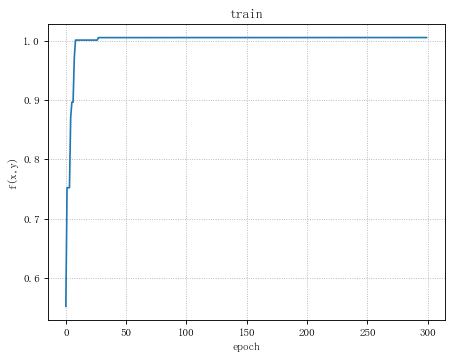

In [68]:
# 迭代结果显示：对于每个epoch，结果趋于收敛
fig2 = plt.figure(dpi=80)
plt.grid(linestyle="dotted")
axes = plt.gca()
plt.plot(np.arange(maxgen), np.array(result))
plt.title('train')
plt.xlabel('epoch', fontdict={"size": 10})
plt.ylabel('f(x,y)', fontdict={"size": 10})

The zbest : [[7.27659614e-05 9.78876942e-05]]
The best fitness : 1.005391426857062


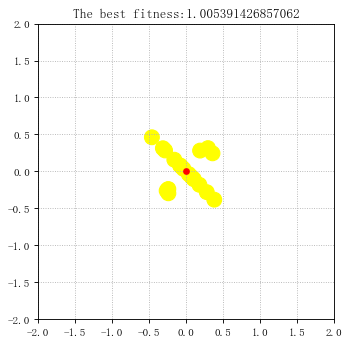

In [69]:
# 
fig3 = plt.figure(dpi=80)
plt.grid(linestyle="dotted")
axes = plt.gca()
axes.set_aspect(1)
# 设置坐标范围
plt.xlim(-2, 2)
plt.ylim(-2, 2)
for i in range(sizepop):
    x = gbest[i][0][0]
    y = gbest[i][0][1]
    draw_circle = plt.Circle((x,y), 0.1, fill=True, color="yellow")
    plt.gcf().gca().add_artist(draw_circle)
# 标题，中文有乱码需要设置字体
plt.title('The best fitness:%s' %(fitnesszbest))
# 显示极值点，标记为红色: c = color, zorder = 图像显示优先级
plt.scatter(zbest[0][0], zbest[0][1], c='r', linewidths=0.1, zorder=2)
print('The zbest : %s' %(zbest))
print('The best fitness : %s' %(fitnesszbest))


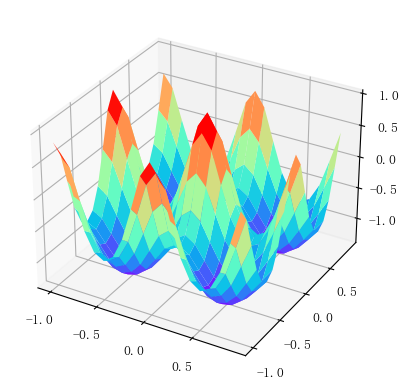

In [70]:
# 显示三维曲面
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax3 = plt.axes(projection='3d')

plt.rcParams['font.sans-serif']=['FangSong'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

#定义三维数据
xx = np.arange(-1,1,0.1)
yy = np.arange(-1,1,0.1)
X, Y = np.meshgrid(xx, yy)
Z = np.sin((X ** 2 + Y ** 2)** 1/2) / ((X ** 2 + Y ** 2) ** 1/2) + np.exp((np.cos(2 * math.pi * X) + np.cos(2 * math.pi * Y)) / 2) - 2.71289

#作图
ax3.plot_surface(X,Y,Z,cmap='rainbow') 
# 改变cmap参数可以控制三维曲面的颜色组合, 一般我们见到的三维曲面就是 rainbow 的

plt.show()